# Top 10 Events

https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/doc/GHCND_documentation.pdf

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import os.path as op
import sys
import folium

import numpy as np
import pandas as pd

sys.path.append("../../../../indicators_setup")
from ind_setup.plotting_int import plot_timeseries_interactive
from ind_setup.colors import get_df_col
from ind_setup.tables import plot_df_table

sys.path.append("../../../functions")
from data_downloaders import GHCN

## Define location and variables of interest

In [3]:
country = 'Palau'
vars_interest = ['TMIN', 'TMAX']

## Get Data

In [4]:
update_data = False
path_data = "../../../data"

## Using Koror Station

Analysis of how much the maximum and minimum temperatures over time are changing. <br>
The analysis of the difference between these 2 variables will allow us to know how the daily variability is being modified

In [5]:
if update_data:
    df_country = GHCN.get_country_code(country)
    print(f'The GHCN code for {country} is {df_country["Code"].values[0]}')

    df_stations = GHCN.download_stations_info()
    df_country_stations = df_stations[df_stations['ID'].str.startswith(df_country.Code.values[0])]
    print(f'There are {df_country_stations.shape[0]} stations in {country}')

In [6]:
if update_data:
    GHCND_dir = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
    id = 'PSW00040309' # Koror Station
    dict_min = GHCN.extract_dict_data_var(GHCND_dir, 'TMIN', df_country_stations.loc[df_country_stations['ID'] == id])[0][0]
    dict_max = GHCN.extract_dict_data_var(GHCND_dir, 'TMAX', df_country_stations.loc[df_country_stations['ID'] == id])[0][0]
    st_data = pd.concat([dict_min['data'], (dict_max['data'])], axis=1).dropna()
    st_data['diff'] = st_data['TMAX'] - st_data['TMIN']
    st_data['TMEAN'] = (st_data['TMAX'] + st_data['TMIN'])/2
    st_data.to_pickle(op.join(path_data, 'GHCN_surface_temperature.pkl'))
else:
    st_data = pd.read_pickle(op.join(path_data, 'GHCN_surface_temperature.pkl'))

## Monthly

In [7]:
st_data = st_data.resample('M').mean()

In [8]:
nevents = 10
top_10 = st_data.sort_values(by='TMAX', ascending=False).head(nevents)

In [9]:
dict_plot = [{'data' : st_data, 'var' : 'TMAX', 'ax' : 1, 'label' : 'TMAX'}]
scatter_dict = [{'data' : top_10, 'var' : 'TMAX', 'ax' : 1, 'label' : 'Top 10 Events'}]

fig = plot_timeseries_interactive(dict_plot, trendline=True, scatter_dict = scatter_dict, figsize = (25, 12));
# fig.write_image("figura.png", format="png")

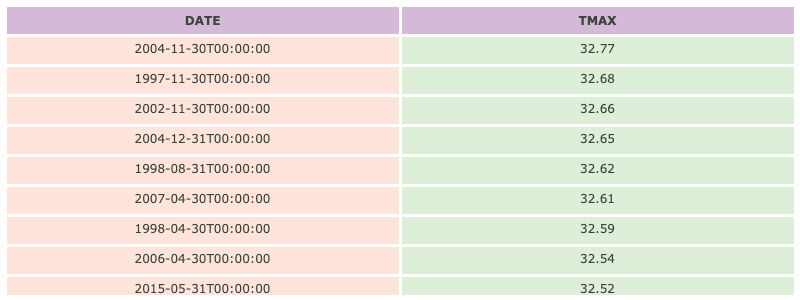

In [10]:
fig = plot_df_table(np.round(top_10, 2)[['TMAX']])


## Annual

In [11]:
st_data = st_data.resample('Y').mean()
top_10 = st_data.sort_values(by='TMAX', ascending=False).head(10)

In [12]:
dict_plot = [{'data' : st_data, 'var' : 'TMAX', 'ax' : 1, 'label' : 'TMAX'}]
scatter_dict = [{'data' : top_10, 'var' : 'TMAX', 'ax' : 1, 'label' : 'Top 10 Events'}]
fig = plot_timeseries_interactive(dict_plot, trendline=True, scatter_dict = scatter_dict, figsize = (25, 12));

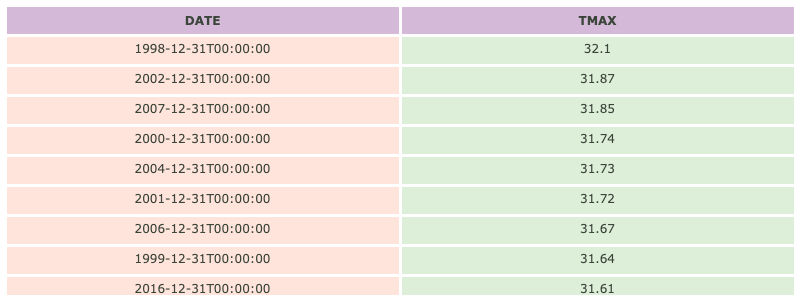

In [13]:
fig = plot_df_table(np.round(top_10, 2)[['TMAX']])
